# 선형 회귀(Linear Regression)

우선 간단한 문제인 회귀 문제(regression)를 살펴보겠습니다. 회귀 문제는 주어진 데이터포인트 $x$에 해당하는 실제 값으로 주어지는 타겟 $y$를 예측하는 과제입니다. 회귀 문제는 현실에서 많이 보이는 문제입니다. 예를 들면, 주택 가격, 기온, 판매량 등과 같은 연속된 값을 예측하는 문제들을 들 수 있습니다. 이는 결과 값이 이미지 분류와 같이 과일의 종류를 예측하는 이산적인(discrete) 구분 문제(classification)와는 다릅니다. 

## 선형 회귀의 기본 요소들

가장 간단하지만 가장 유용한 접근 방법인 선형 회귀를 정의하는 방법으로 예측 함수가 입력 피처들의 선형 조합으로 표현된다고 가정합니다. 이 때문에, 이를 _선형_ 회귀(linear regression)라는 이름으로 부릅니다.

## 선형 모델

간단한 예로, 집의 면적(제곱 미터)과 지어진 후 몇 년이 되었는지를 입력으로 사용해서 주택 가격을 예측하는 문제를 들어보겠습니다. 이 경우 모델을 다음과 같은 수식으로 표현할 수 있습니다.

$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b$$

이 공식은 명확해 보이는데, 두 개 이상의 입력 변수가 사용되는 경우는 굉장히 긴 공식이 됩니다. (변수 이름을 지정하는 것조차 지루한 일입니다.) 하지만, 수학자들이 발명한 벡터를 사용하면 간단하게 표현이 가능합니다.  $d$ 개의 변수가 있다고 하면, 모델은 아래와 같이 표현됩니다.

$$\hat{y} = w_1 \cdot x_1 + ... + w_d \cdot x_d + b$$

데이터 포인트들을 $X$ 로, 타겟 변수는  $y$ 로 표현합니다. 각 데이터 포인트 $x_i$ 와 이에 대한 label 값인 $y_i$ 를 추정해서 연관시켜주는 $가중치(weight)$ 벡터 $w$ 와 $bias$ $b$ 를 찾아보는 것을 시도해봅니다. 이를 조금 전문적인 수학 기호로 표현하면, 위 긴 합은 $\hat{y} = \mathbf{w}^\top \mathbf{x} + b$ 이 됩니다. 마지막으로, 데이터 포인트들의 집합 $X$ 와 예측 값 $\hat{\mathbf{y}}$ 은 아래와 같은 행렬-벡터 곱의 공식이 됩니다.

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b$$

$x$ 와 ​$y$ 의 관계가 대략 선형적이라고 가정하는 것은 상당히 합리적입니다. 측정하는데 다소 오류가 발생할 수도 있습니다. 예를 들면, 주택 가격은 일반적으로 하락하지만, 오래될 수록 가치가 더 해지는, 오래된 역사적인 주택의 경우는 해당되지 않을 수 있습니다. 파라메터 ​$w$ 를 찾기 위해서는 두 가지가 더 필요합니다. 하나는, 현재 모델의 품질(quality)를 측정하는 방법과 두번째는 품질을 향상시킬 수 있는 방법입니다.

## 학습 데이터

우선 필요한 것은 데이터입니다. 예를 들면, 여러 집들의 실제 판매가격과 그 집들의 크기와 지어진 후 몇 년이 지났는지에 대한 데이타가 필요합니다. 우리가 하고자 하는 것은 모델이 예측한 집 가격과 실제 가격의 차이(오류)를 최소화하는 모델 파라미터를 찾는 것입니다. 머신러닝의 용어로는, 데이터셋은 '학습 데이터' 또는 '학습 셋'이라고 하고, 하나의 집 (집과 판매가격)을 '샘플', 그리고 그 집의 판매가격을 '레이블(label)'이라고 합니다. 레이블을 예측하기 위해서 사용된 두 값은 '피처(feature)' 또는 '공변량(covariate)'이라고 합니다. 피처는 샘플의 특징을 표현하는데 사용됩니다.

일반적으로 수집한 샘플의 개수를 $n$ 으로 표기하고, 각 샘플은 인덱스 $i$ 를 사용해서 $x^{(i)} = [x_1^{(i)}, x_2^{(i)}]$ 와 레이블은  $y^{(i)}$ 로 표현합니다.

## Loss 함수

모델 학습을 위해서는 모델이 예측된 가격과 실제 가격의 오차를 측정해야 합니다. 보통 오차는 0 또는 양수값을 선택하고, 값이 작을 수록, 오차가 적음을 의미합니다. 일반적으로 제곱 함수를 사용하며, index $i$ 의 샘플에 대한 오차 계산은 다음과 같이 합니다.

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2,$$

수식에 곱해진 1/2 상수값은 2차원 항목을 미분했을 때 값이 1이되게 만들어서 조금 더 간단하게 수식을 만들기 위해서 사용된 값입니다. 이를 사용하면, 오류값이 작을 수록 예측된 값이 실제 가격과 더 비슷해지고, 두 값이 같으면 오류는 0이 됩니다. 학습 데이터셋이 주어졌을 때, 이 오류는 모델 파라미터들에만 의존합니다. 즉, 이 함수를 모델 파라미터를 파라미터로 갖는 함수로 생각할 수 있습니다. 머신러닝에서는 이와같이 오류를 측정하는 함수를 'loss function' 이라고 부릅니다. 위에서 정의한 제곱 오류 함수는 'square loss'라고 부릅니다.

조금 더 구체적으로 살펴보기 위해서, 집값이 집 크기에만 의존한다는 모델을 가정해서 일차원 문제로 회귀 문제를 도식화한 것을 예로 들어보겠습니다. 

![Linear regression is a single-layer neural network. ](../img/linearregression.svg)

위 그래프에서 보이는 것처럼, 이차 의존성 (quadratic dependence)으로 인해서 예측값  $\hat{y}^{(i)}$ 과 실제값 $y^{(i)}$ 의 큰 차이는 loss 에서는 더 크게 반영됩니다. 전체 데이터셋에 대해서 모델의 품질을 측정하기 위해서 학습셋에 대한 loss의 평균값을 사용할 수 있습니다.

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

학습 샘플들의 평균 loss를 최소화하는 모델 파라미터  $\mathbf{w}^*$ 와 $b^*$ 를 찾는 것이 모델을 학습시키는 것입니다.

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

## 최적화 알고리즘

모델과 loss 함수가 상대적으로 간단하게 표현되는 경우 앞에서 정의한 loss를 최소화하는 방법은 역행렬을 사용해서 명확한 수식으로 표현할 수 있습니다. 이 수식은 다양하고 좋은 수학적 분석을 적용할 수 있어서 좋지만, 적은 경우에만 적용할 수 있는 제약이 있습니다. (즉, multilayer perceptron이나 비선형 레이어가 있으면 적용할 수 없습니다.) 대부분 딥러닝 모델은 위 분석적 방법을 적용할 수 없습니다. loss 함수의 값은 점진적인 최적화 알고리즘을 사용해서 모델 파라미터를 유한한 횟수로 업데이트하면서 줄이는 방법을 적용해야만 합니다.

딥러닝에서는 산술적인 솔루션으로 미니 배치를 적용한 stochastic gradient descent 방법이 널리 사용되고 있습니다. 사용되는 알고리즘은 간단합니다: 우선, 일반적으로는 난수를 이용해서 모델 파라미터를 초기화합니다. 그 후, 데이터를 반복적으로 사용해서 loss 함수의 값을 줄이는 것을 반복합니다. 각 반복에서는 학습 데이터에서 미리 정한 개수만큼의 샘플들을 임의로 또 균일하게 뽑아서 미니 배치 $\mathcal{B}$ 를 구성하고, 미니 배치의 값들에 대한 평균 loss 값의 모델 파라미터에 대한 미분을 구합니다. 마지막으로 이 결과와 미리 정의된 스탭 크기  $\eta > 0$ 를 곱해서 loss 값이 최소화되는 방향으로 파라미터를 변경합니다. 수식으로 표현하면 다음과 같습니다.

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b)$$

이차원 loss 및 선형 함수에 대해서는 아래와 같이 명시적으로 이를 계산할 수 있습니다. 여기서  $\mathbf{w}$ 와 $\mathbf{x}$ 는 벡터입니다. 벡터를 잘 사용하면 $w_1, w_2, \ldots w_d$ 와 같은 계수를 읽기 쉬운 수식으로 표현할 수 있습니다.
$$
\begin{aligned}
\mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) && =
w - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\
b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  && =
b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right).
\end{aligned}
$$

위 수식에서  $|\mathcal{B}|$ 는 각 미니 배치의 샘플 개수를 의미하고, $\eta$ 는 '학습 속도(learning rate)'를 의미 합니다. 학습 속도는 양수 값을 사용합니다. 여기서 중요한 점은 미니 배치 크기와 학습 속도는 모델 학습을 통해서 찾아지는 값이 아니라 여러분이 직접 선택을 해야하는 값들입니다. 따라서, 우리는 이 값들을 *hyper-parameters* 라고 부릅니다. 우리가 흔히 *hyper-parameters* 튜닝이라고 하는 일은 이 값들을 조정하는 것을 의미합니다. 아주 나쁜 경우에는 적당한 *hyper-parameters* 를 찾기까지 반복된 실험을 수행해야 할 수도 있습니다. 더 좋은 방법으로는 모델 학습의 일부로 이 값들을 찾는 것이 있습니다만, 심화 주제이기 때문에 여기서는 다루지 않겠습니다.

## 모델을 이용한 예측

모델 학습이 끝나면 모델 파라미터  $\mathbf{w}, b$ 에 해당하는 값 $\hat{\mathbf{w}}와 \hat{b}$ 을 저장합니다. 학습을 통해서 loss 함수를 최소화 시키는 최적의 값 $\mathbf{w}^*, b^*$ 를 구할 필요는 없습니다. 다만, 이 최적의 값에 근접하는 값을 학습을 통해서 찾는 것입니다. 이후, 학습된 선형 회귀 모델  $\hat{\mathbf{w}}^\top x + \hat{b}$ 을 이용해서 학습 데이터셋에 없는 집 정보에 대한 집 가격을 추정합니다. "추정"을 "모델 예측(prediction)" 또는 "모델 추론 (inference)" 라고 합니다.

"추론(inference)"이라는 용어는 실제로는 잘못 선택된 용어지만, 딥러닝에서는 많이 사용하는 용어로 자리잡았습니다. 통계에서 추론은 다른 데이터를 기반으로 파라미터들과 결과를 추정하는 것을 의미하기 때문에, 통계학자들과 이야기할 때 이 용어로 인해서 혼동을 가져오기도 합니다. 하지만, 이미 보편적으로 사용되고 있기 때문에, 학습된 모델에 새로운 데이터를 적용하는 것을 추론이라는 용어로 사용하겠습니다. (수백년을 걸친 통계학자들에게 미안함을 표합니다.)

## 선형 회귀에서 딥 네트워크로

지금까지 선형 함수만을 이야기했는데, 뉴럴 네트워크는 이 보다 많은 것을 다룹니다. 물론 선형 함수는 중요한 구성 요소입니다. 이제 모든 것을 '층(layer)' 표기법으로 다시 기술해 보겠습니다.

## 뉴럴 네트워크 다이어그램

딥러닝에서는 모델의 구조를 뉴럴 네트워크 다이어그램으로 시각화할 수 있습니다. 뉴럴 네트워크 구조로 선형 회귀를 좀 더 명확하게 표현해보면, 그림 3.1에서와 같이 뉴럴 네트워크 다이어그램을 이용해서 이 절에서 사용하고 있는 선형 회귀 모델을 도식화 할 수 있습니다. 이 뉴럴 네트워크 다이어그램에서는 모델 파라미터인 가중치와 bias를 직접 표현하지 않습니다.

![Linear regression is a single-layer neural network. ](../img/singleneuron.svg)

위 뉴럴 네트워크에서 입력값은  $x_1, x_2, \ldots x_d$ 입니다. 때로는 입력값의 개수를 피처 차원(feature dimension)이라고 부르기도 합니다. 이 경우에는 입력값의 개수는 $d$ 이고, 출력값의 개수는 1 입니다. 출력값을 선형 회귀의 결과를 직접 결과로 사용한다는 것을 기억해두세요. 입력 레이어에는 어떤 비선형이나 어떤 계산이 적용되지 않기 때문에, 이 네트워크의 총 레이어의 개수는 1개입니다. 종종 이런 네트워크를 단일 뉴론이라고 부르기도 합니다. 모든 입력들이 모든 출력(이 경우는 한개의 출력)과 연결되어 있기 때문에, 이 레이어는 fully connected layer 또는 dense layer라고 불립니다.

## 생물학으로 우회

뉴럴 네트워크라는 이름은 신경과학으로부터 나왔습니다. 얼마나 많은 네트워크 구조가 만들어졌는지 잘 이해하기 위해서, 우선 뉴론(neuron)의 기본적인 구조를 살펴볼 필요가 있습니다. 비유 하자면, 입력 단자인 수상돌기(dendrities), CPU인 핵(nucleu), 출력연결인 축삭(axon), 그리고, 시냅스를 통해서 다른 뉴런과 연결하는 축삭 단자(axon terminal)라고 하면 충분합니다.

![The real neuron](../img/Neuron.svg)

수상돌기는 다른 뉴론들로 부터 온 정보 $x_i$ 를 받습니다. 구체적으로는 그 정보는 시텝틱 가중치 $w_i$ 가 적용된 정보값입니다. 이 가중치는 입력에 얼마나 반응을 해야하는지 정의합니다. (즉, $x_i w_i$ 를 통해서 활성화 됨) 이 모든 값들은 핵에서 $y = \sum_i x_i w_i + b$,  로 통합되고, 이 정보는 축삭(axon)으로 보내져서 다른 프로세스를 거치는데, 일반적으로는 $\sigma(y)$ 를 통해서 비선형 처리가 됩니다. 이 후, 최종 목적지 (예를 들면 근육) 또는 수상돌기를 거쳐서 다른 뉴론으로 보내집니다.

뇌의 구조는 아주 다양합니다. 어떤 것들은 다소 임의적으로 보이지만, 어떤 것들은 아주 규칙적인 구조를 가지고 있습니다. 예를 들면, 여러 곤충들의 시각 시스템은 아주 구조적입니다. 이 구조들에 대한 분석을 통해서 신경과학자들은 새로운 아키텍처를 제안하는데 영감을 받기도 하고, 어떤 경우에는 아주 성공적이었습니다. 하지만, 비행기가 새로부터 영감을 받아서 만들어 졌지만 차이가 많은 것과 같이, 이 둘의 직접적인 관계를 찾아보는 것은 오류가 되기도 합니다. 수학과 컴퓨터과학이 영감의 같은 근원이라고 볼 수 있습니다

## 벡터화로 빠르게 만들기

모델 학습 및 예측을 수행할 때, 벡터 연산을 사용하고 이를 통해서 여러 값들은 한번에 처리합니다. 이것이 왜 중요한지 설명하기위해서 벡터들을 더하는 두 가지 방법을 생각해봅시다. 우선 1000 차원의 벡터 두 개를 생성합니다.

In [1]:
from mxnet import nd
from time import time

a = nd.ones(shape=10000)
b = nd.ones(shape=10000)

두 벡터를 더하는 방법 중에 하나는 for loop을 이용해서 벡터의 각 값들을 하나씩 더하는 것입니다.

In [2]:
start = time()
c = nd.zeros(shape=10000)
for i in range(10000):
    c[i] = a[i] + b[i]
time() - start

1.4894440174102783

다른 방법으로는 두 벡터를 직접 더할 수 있습니다.

In [3]:
start = time()
d = a + b
time() - start

0.0002465248107910156

당연하게도 벡터를 직접 더하는 방법이 훨씬 더 빠릅니다. 코드를 벡터화하는 것은 연산 속도를 빠르게 하는 좋은 방법입니다. 마찬가지로 연산식을 간단하게 하고, 표기에 있어서 잠재적인 오류를 줄여주는 효과도 있습니다.

## 표준 분포와 제곱 Loss

아래 내용은 옵션이니, 다음으로 넘어가도 됩니다. 하지만, 딥러닝 모델을 구성에 있어서 디자인 선택에 대한 이해를 높이는데 도움이 됩니다. 위에서 봤듯이, squared loss  $l(y, \hat{y}) = \frac{1}{2} (y - \hat{y})^2​$ 는 간단한 편미분  $\partial_{\hat{y}} l(y, \hat{y}) = (\hat{y} - y)​$ 과 같은 좋은 특징들을 가지고 있습니다. 즉, gradient가 예측값과 실제값의 차이로 계산됩니다. 선형 회귀는 [전통적인 통계 모델](https://en.wikipedia.org/wiki/Regression_analysis#History)입니다. Legendre가 처음으로 least squares regression을 1805년에 개발했고, 1809년에 Gauss에 의해서 재발견되었습니다. 이를 조금 더 잘 이해하기 위해서 평균이  $\mu​$ 이고 분산이 $\sigma^2​$ 인 정규 분포(normal distribution)를 떠올려봅시다. 

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right)​$$

이는 다음과 같이 시각화될 수 있습니다.

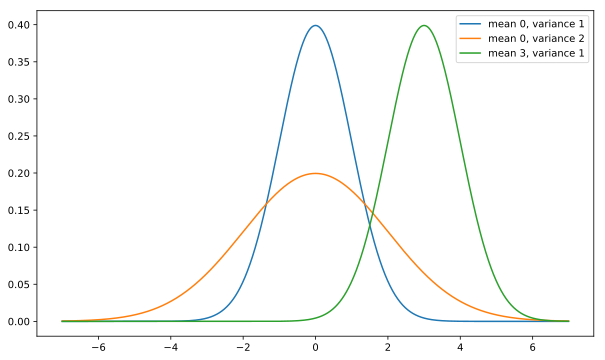

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display
from mxnet import nd
import math

x = nd.arange(-7, 7, 0.01)
# Mean and variance pairs
parameters = [(0,1), (0,2), (3,1)]

# Display SVG rather than JPG
display.set_matplotlib_formats('svg')
plt.figure(figsize=(10, 6))
for (mu, sigma) in parameters:
    p = (1/math.sqrt(2 * math.pi * sigma**2)) * nd.exp(-(0.5/sigma**2) * (x-mu)**2)
    plt.plot(x.asnumpy(), p.asnumpy(), label='mean ' + str(mu) + ', variance ' + str(sigma))

plt.legend()
plt.show()

위 그림에서 보이듯이, 평균을 변경하면 함수를 이동시키고, 편차를 증가시키면 피크는 낮추고 더 펼쳐지게 만듭니다. least mean square loss를 적용한 선형 회귀에서 중요한 가정은 관찰들은 노이즈가 있는 관찰에서 얻어지고, 이 노이즈들은 데이터에 더해진다는 것입니다.

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, \sigma^2)​$$

이는 주어진 $x​$ 에 대해서 특정 $y​$ 를 얻을 가능성(likelihood)는 다음과 같이 표현됩니다.

$$p(y|\mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right)​$$

가장 근접한 $b​$ 와 $\mathbf{w}​$ 값을 찾는 좋은 방법은 전체 데이터셋에 대한 likelihood를 최대화하는 것입니다.

$$p(Y|X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)})​$$

파라미터들에 대해서 데이터의 likelihood를 최대화하는 것은 *Maximum Likelihood Principle* 로 잘 알려져 있고, 이런 estimator들은  *Maximum Likelihood Estimators* (MLE)라고 불립니다. 아쉽게도, 많은 지수 함수들의 곱을 최적화하는 것은 구현하는 것이나, 종이에 적어보는 것이나 아주 어렵습니다. 대신, 더 좋은 방법은 *Negative Log-Likelihood* $-\log P(Y|X)​$ 를 최소화하는 것입니다. 위 예는 다음 수식으로 표현됩니다.

$$-\log P(Y|X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2​$$

이 공식을 잘 살펴보면  $-\log P(Y|X)$ 를 최소화할 때는 첫번째 항목을 무시할 수 있습니다. 왜냐하면, 첫번째 항목은 $w$, $b$ 그리고 데이터와도 연관이 없기 때문입니다. 두번째 항목은 우리가 이전에 봤던 objective와 상수 $\frac{1}{\sigma^2}$ 가 곱해진 것을 빼면 동일합니다. 이 값은 가장 근접한 솔루션을 찾는 것만 원한다면 무시할 수 있고, 이렇게 하면 additive Gaussian noise를 갖는 선형 모델의 likelihood를 최대화하는 것은 squared loss를 적용한 선형 회귀와 동일한 문제로 정의됩니다.

## 요약

* 머신러닝에서 중요한 요소는 학습 데이터, loss 함수, 최적화 알고리즘, 그리고 당연하지만 모델 자체입니다.
* 벡터화는 모든 것(수학)을 좋게 만들고, (코드를) 빠르게 만들어 줍니다.
* objective 함수를 최소화하는 것과 maximum likelihood를 구하는 것은 같은 것입니다.
* 선형 모델도 뉴럴 모델입니다.

## 문제

1. 데이터 $x_1, \ldots x_n \in \mathbb{R}$ 가 있다고 가정합니다. 우리의 목표는  $\sum_i (x_i - b)^2$ 를 최소화시키는 상수 $b$ 를 찾는 것입니다.
    * 최적의 닫힌 형식의 해(closed form solution)을 찾아보세요.
    * 표준 분포의 용어로 이것은 무엇을 의미하나요?
1. Quadratic loss를 사용한 선형 회귀의 최적화 문제를 닫힌 형식으로 풀기를 원한다고 가정합니다. 간단하게 하기 위해서, 문제에서 편향(bias) $b$ 는 생략해도 됩니다.
    * 문제를 행렬과 벡터 표기를 사용해서 다시 기술해보세요. (힌트 - 모든 데이터를 하나의 행렬로 취급합니다.)
    * 최적화 문제를 $w$ 에 대한 경사(gradient)를 계산하세요.
    * 행렬 방적식을 풀어서 닫힌 형식의 해(closed form solution)를 구하세요.
    * 언제 이 방법이 확률적 경사 하강법(stochastic gradient descent) (즉, 위에서 우리가 논의한 점진적 최적화 접근법)보다 좋을까요? 언제 이 방법이 틀릴까요? (힌트 - $x$가 고차원이면 어떻게 될까요? 만약 많은 관찰들이 아주 작으면 어떻게 될까요? )
1. 부가 노이즈  $\epsilon$ 을 결정하는 노이즈 모델이 지수 분포라고 가정합니다. 즉, $p(\epsilon) = \frac{1}{2} \exp(-|\epsilon|)$.
    * 모델 $-\log p(Y|X)$ 의 데이터에 대한 네가티브 로그-가능도(log-likelihood)를 적어보세요.
    * 닫힌 형식의 해를 찾을 수 있나요?
    * 이 문제를 푸는 확률적 경사 하강법(stochastic gradient descent) 알고리즘을 제안하세요. 무엇이 잘못될 가능성이 있나요? (힌트 - 파라미터를 업데이트할 때, 정류점(stationary point) 근처에서 어떤 일이 일어날까요?)
1. NumPy와 같은 다른 패키지들이나 MATLAB과 같은 다른 프로그램 언어를 사용해서 두 벡터를 더할 때의 실행시간들을 비교해보세요.

## Scan the QR Code to [Discuss](https://discuss.mxnet.io/t/2331)

![](../img/qr_linear-regression.svg)